In [10]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf


In [11]:
Startups=pd.read_csv("Downloads\\50_Startups.csv")
Startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [12]:
Startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [13]:
Startups.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


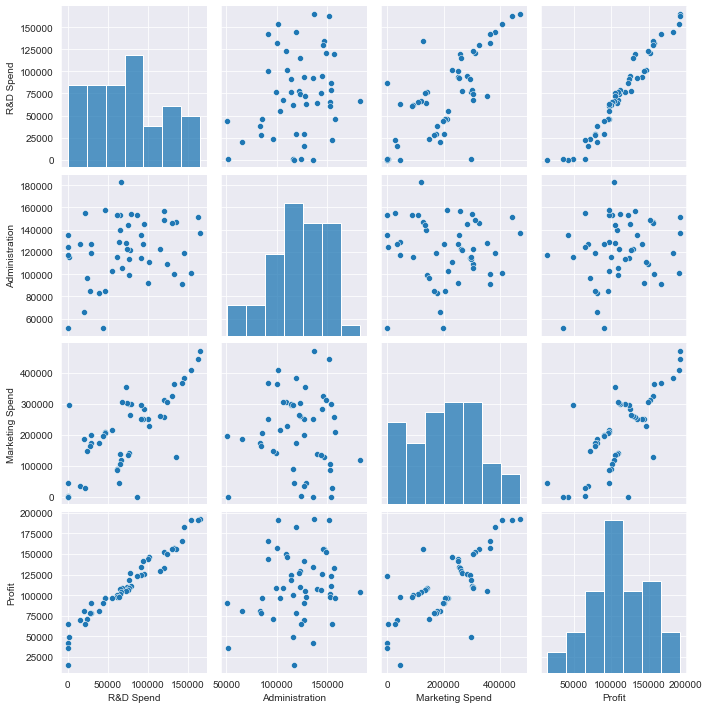

In [14]:
sns.set_style(style='darkgrid')
sns.pairplot(Startups)

In [17]:
Startups1=Startups.rename({'R&D Spend':'RD','Administration':'Admin','Marketing Spend':'Market','Profit':'Pro'},axis=1)
Startups1

,RD,Admin,Market,State,Pro
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [19]:
model=smf.ols('Pro~RD+Admin+Market+State',data=Startups1).fit()

In [20]:
model.params

Intercept            50125.343832
State[T.Florida]       198.788793
State[T.New York]      -41.887019
RD                       0.806023
Admin                   -0.027004
Market                   0.026980
dtype: float64

In [23]:
Startups1['Prediction']=model.fittedvalues
Startups1

,RD,Admin,Market,State,Pro,Prediction_Model,Prediction
0,165349.20,136897.80,471784.10,New York,192261.83,192390.571364,192390.571364
1,162597.70,151377.59,443898.53,California,191792.06,189071.320106,189071.320106
2,153441.51,101145.55,407934.54,Florida,191050.39,182276.186735,182276.186735
3,144372.41,118671.85,383199.62,New York,182901.99,173584.976191,173584.976191
4,142107.34,91391.77,366168.42,Florida,166187.94,172277.133818,172277.133818
5,131876.90,99814.71,362861.36,New York,156991.12,163473.807120,163473.807120
6,134615.46,147198.87,127716.82,California,156122.51,158099.292788,158099.292788
7,130298.13,145530.06,323876.68,Florida,155752.60,160155.644651,160155.644651
8,120542.52,148718.95,311613.29,New York,152211.77,151634.743327,151634.743327
9,123334.88,108679.17,304981.62,California,149759.96,154829.662529,154829.662529


In [24]:
Startups1['Error']=model.resid
Startups1

,RD,Admin,Market,State,Pro,Prediction_Model,Prediction,Error
0,165349.20,136897.80,471784.10,New York,192261.83,192390.571364,192390.571364,-128.741364
1,162597.70,151377.59,443898.53,California,191792.06,189071.320106,189071.320106,2720.739894
2,153441.51,101145.55,407934.54,Florida,191050.39,182276.186735,182276.186735,8774.203265
3,144372.41,118671.85,383199.62,New York,182901.99,173584.976191,173584.976191,9317.013809
4,142107.34,91391.77,366168.42,Florida,166187.94,172277.133818,172277.133818,-6089.193818
5,131876.90,99814.71,362861.36,New York,156991.12,163473.807120,163473.807120,-6482.687120
6,134615.46,147198.87,127716.82,California,156122.51,158099.292788,158099.292788,-1976.782788
7,130298.13,145530.06,323876.68,Florida,155752.60,160155.644651,160155.644651,-4403.044651
8,120542.52,148718.95,311613.29,New York,152211.77,151634.743327,151634.743327,577.026673
9,123334.88,108679.17,304981.62,California,149759.96,154829.662529,154829.662529,-5069.702529


In [25]:
model.pvalues

Intercept            4.444178e-09
State[T.Florida]     9.532429e-01
State[T.New York]    9.897941e-01
RD                   2.578772e-21
Admin                6.077373e-01
Market               1.226769e-01
dtype: float64

In [26]:
model.rsquared,model.rsquared_adj

(0.9507524843355148, 0.945156175737278)

In [31]:
rsq_RD=smf.ols('RD~Admin+Market',data=Startups1).fit().rsquared
vif_RD=1/(1-rsq_RD)

In [32]:
rsq_Admin=smf.ols('Admin~RD+Market',data=Startups1).fit().rsquared
vif_Admin=1/(1-rsq_RD)

In [33]:
rsq_Market=smf.ols('Market~Admin+RD',data=Startups1).fit().rsquared
vif_Market=1/(1-rsq_RD)

In [34]:
d1={'Variables':['RD','Admin','Market'],'VIF':[vif_RD,vif_Admin,vif_Market]}
vif_frame=pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,RD,2.468903
1,Admin,2.468903
2,Market,2.468903


<function matplotlib.pyplot.show(close=None, block=None)>

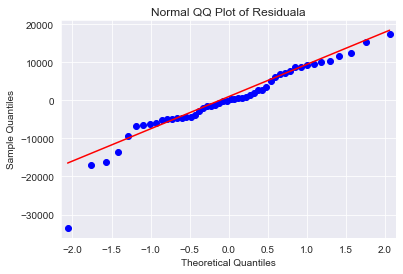

In [37]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal QQ Plot of Residuala")
plt.show

<AxesSubplot:xlabel='Error'>

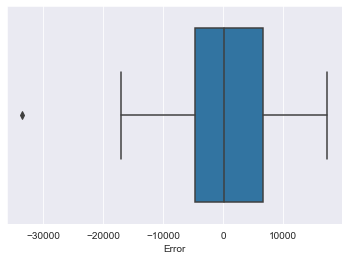

In [38]:
sns.boxplot(Startups1['Error'])

<AxesSubplot:xlabel='Error', ylabel='Count'>

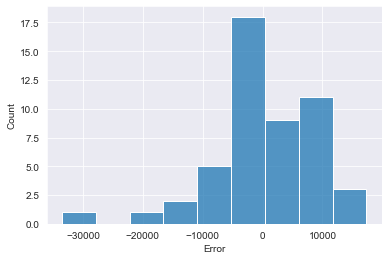

In [39]:
sns.histplot(Startups1['Error'])

<AxesSubplot:xlabel='Error', ylabel='Density'>

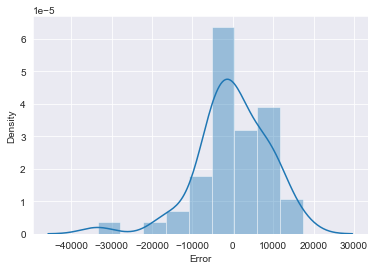

In [40]:
sns.distplot(Startups1['Error'])

In [41]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

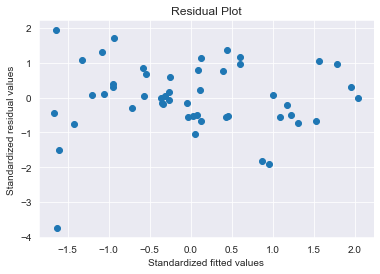

In [42]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [43]:
get_standardized_values(model.resid).mean()

-5.329070518200751e-17

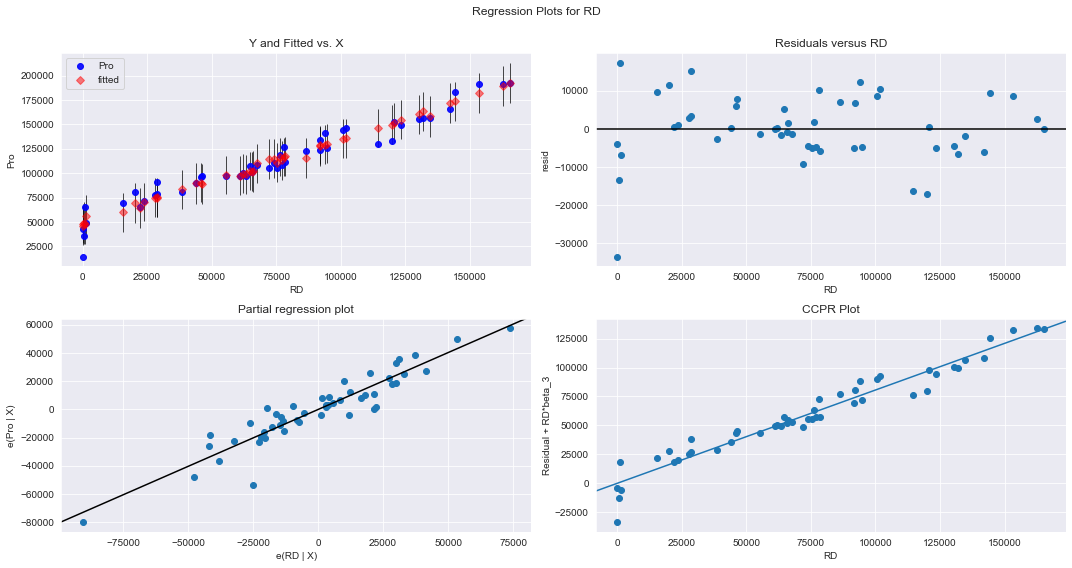

In [44]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"RD",fig=fig)
plt.show()

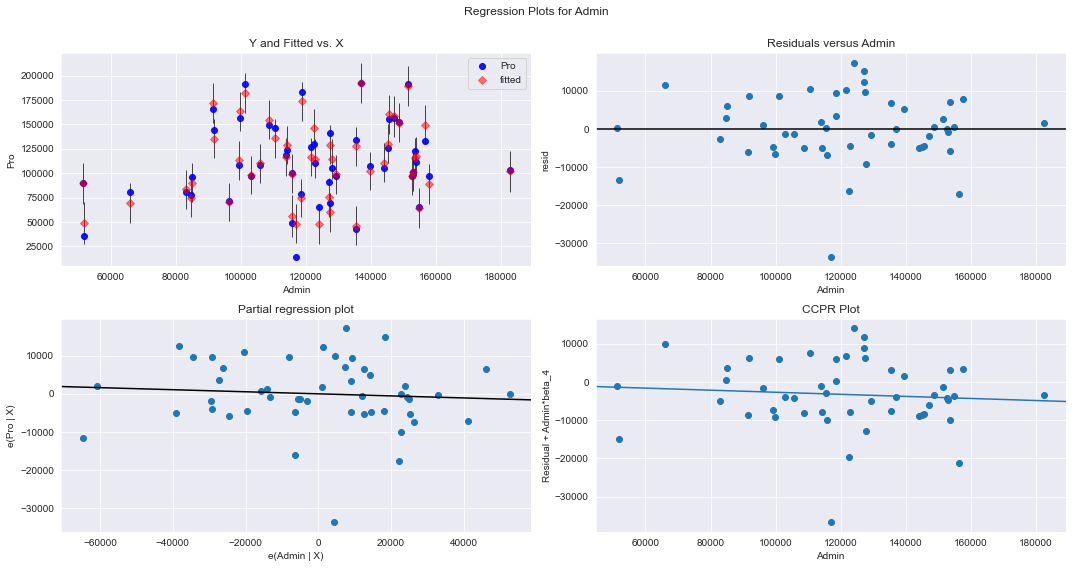

In [45]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Admin",fig=fig)
plt.show()

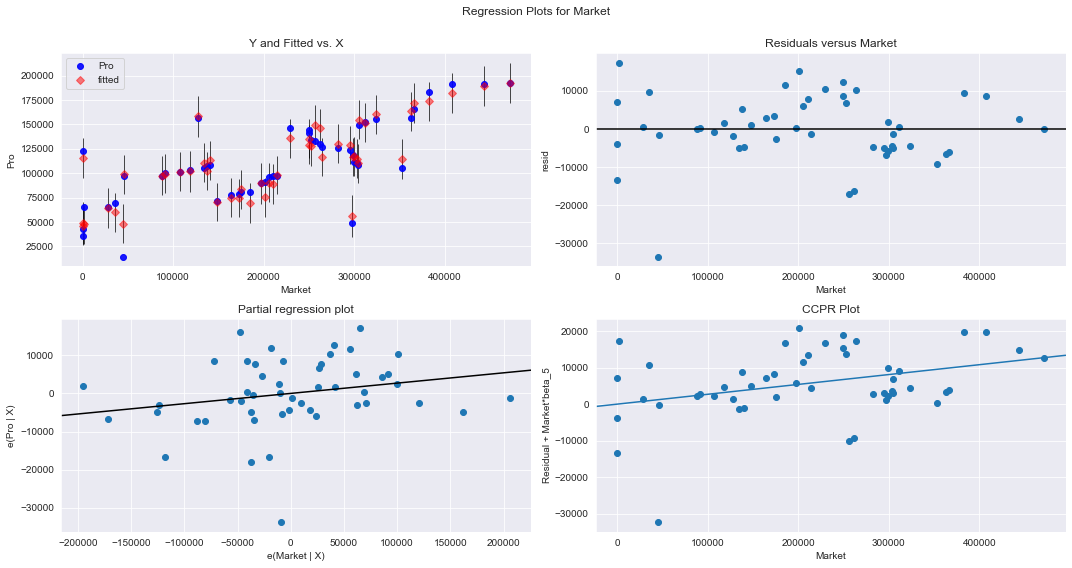

In [46]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Market",fig=fig)
plt.show()

In [48]:
Startups1.shape

(50, 8)

In [49]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

In [50]:
c

array([7.67941282e-06, 3.96002384e-03, 2.78948395e-02, 2.35705108e-02,
       1.40231490e-02, 1.17098970e-02, 2.49314176e-03, 4.16542624e-03,
       7.29467176e-05, 6.31415598e-03, 2.21391699e-02, 1.93512168e-02,
       2.13263552e-02, 7.40092001e-03, 7.20165958e-02, 4.34157410e-02,
       1.57591120e-02, 4.33058862e-03, 3.43997076e-03, 3.28909738e-02,
       7.03247647e-04, 1.17002661e-02, 3.52541534e-03, 3.68801928e-04,
       5.07030667e-03, 4.16365620e-03, 5.79414020e-03, 3.25030423e-02,
       1.07438091e-03, 1.14685871e-04, 2.67092819e-05, 4.26003186e-06,
       6.55180125e-04, 2.69550649e-04, 2.09894518e-02, 8.32171521e-03,
       5.92471519e-02, 7.19280440e-05, 5.58017593e-02, 1.60830329e-03,
       2.27122555e-03, 2.19513492e-03, 1.66164967e-04, 2.33988898e-02,
       1.16697070e-04, 9.43947846e-02, 4.23233340e-02, 4.48153392e-03,
       1.56376134e-01, 2.63959436e-01])

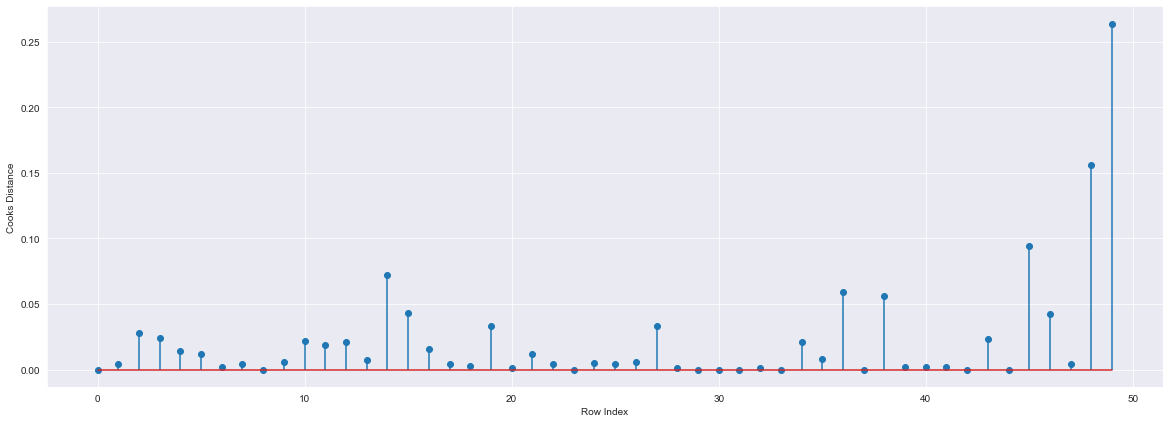

In [52]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(Startups1)),np.round(c,3))
plt.xlabel("Row Index")
plt.ylabel("Cooks Distance")
plt.show()


In [53]:
(np.argmax(c),np.max(c))

(49, 0.2639594358721132)

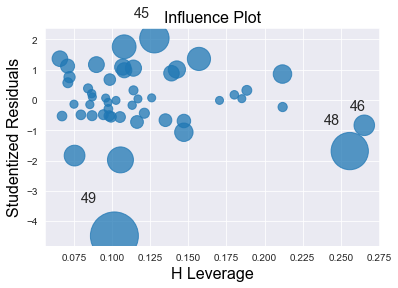

In [78]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [57]:
Startups1.shape

(50, 8)

In [59]:
k=4
n=50
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.30000000000000004

In [71]:
Startups1[Startups1.index.isin([48,49])]

,RD,Admin,Market,State,Pro,Prediction_Model,Prediction,Error
48,542.05,51743.15,0.00,New York,35673.41,49123.073082,49123.073082,-13449.663082
49,0.00,116983.80,45173.06,California,14681.40,48185.038791,48185.038791,-33503.638791


In [74]:
Startups2=Startups1.drop(Startups.index[49],axis=0).reset_index()
Startups2

,index,RD,Admin,Market,State,Pro,Prediction_Model,Prediction,Error
0,0,165349.20,136897.80,471784.10,New York,192261.83,192390.571364,192390.571364,-128.741364
1,1,162597.70,151377.59,443898.53,California,191792.06,189071.320106,189071.320106,2720.739894
2,2,153441.51,101145.55,407934.54,Florida,191050.39,182276.186735,182276.186735,8774.203265
3,3,144372.41,118671.85,383199.62,New York,182901.99,173584.976191,173584.976191,9317.013809
4,4,142107.34,91391.77,366168.42,Florida,166187.94,172277.133818,172277.133818,-6089.193818
5,5,131876.90,99814.71,362861.36,New York,156991.12,163473.807120,163473.807120,-6482.687120
6,6,134615.46,147198.87,127716.82,California,156122.51,158099.292788,158099.292788,-1976.782788
7,7,130298.13,145530.06,323876.68,Florida,155752.60,160155.644651,160155.644651,-4403.044651
8,8,120542.52,148718.95,311613.29,New York,152211.77,151634.743327,151634.743327,577.026673
9,9,123334.88,108679.17,304981.62,California,149759.96,154829.662529,154829.662529,-5069.702529


In [73]:
Startups2.shape

(49, 9)

In [77]:
Startups2=Startups2.drop(['index'],axis=1)
Startups2

,RD,Admin,Market,State,Pro,Prediction_Model,Prediction,Error
0,165349.20,136897.80,471784.10,New York,192261.83,192390.571364,192390.571364,-128.741364
1,162597.70,151377.59,443898.53,California,191792.06,189071.320106,189071.320106,2720.739894
2,153441.51,101145.55,407934.54,Florida,191050.39,182276.186735,182276.186735,8774.203265
3,144372.41,118671.85,383199.62,New York,182901.99,173584.976191,173584.976191,9317.013809
4,142107.34,91391.77,366168.42,Florida,166187.94,172277.133818,172277.133818,-6089.193818
5,131876.90,99814.71,362861.36,New York,156991.12,163473.807120,163473.807120,-6482.687120
6,134615.46,147198.87,127716.82,California,156122.51,158099.292788,158099.292788,-1976.782788
7,130298.13,145530.06,323876.68,Florida,155752.60,160155.644651,160155.644651,-4403.044651
8,120542.52,148718.95,311613.29,New York,152211.77,151634.743327,151634.743327,577.026673
9,123334.88,108679.17,304981.62,California,149759.96,154829.662529,154829.662529,-5069.702529
